In [1]:
import os
os.chdir('C:/Users/gusahil/Documents/Data Science Endeavours/Sarcasm Detection')
print (os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import nltk

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')

pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

C:\Users\gusahil\Documents\Data Science Endeavours\Sarcasm Detection


C:\Users\gusahil\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Reading the JSON File
raw_df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
raw_df.head(1000)

article_link  \
0    https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5                                                               
1    https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365                                                          
2    https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697                                                     
3    https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302                                                   
4    https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb                                           
5    https://www.huffingtonpost.com/entry/advancing-the-worlds-women_b_6810038.html                                                                    
6    https://www.huffingtonpost.com/entry/how-meat-is-grown-in-a-lab_us_561d1189e4b0c5a1ce607e86                                                       
7    https://www.huffingtonpost.com/entry/boxed-college-tuition-ben_n_7445644.html                                                                     
8    https://politics.theonion.com/top-snake-handler-leaves-sinking-huckabee-campaign-1819578231                                                       
9    https://www.huffingtonpost.com/entry/fridays-morning-email-inside-trumps-presser-for-the-ages_us_58a6e33ee4b07602ad53a315                         
10   https://www.huffingtonpost.com/entry/airline-passengers-tackle-man-who-rushes-cockpit-in-bomb-threat_us_59302e57e4b07572bdbf9460                  
11   https://www.huffingtonpost.com/entry/facebook-healthcare_n_5926140.html                                                                           
12   https://www.huffingtonpost.comhttp://www.theguardian.com/world/2016/may/31/north-korea-praises-trump-and-urges-us-voters-to-reject-dull-hillary   
13   https://www.huffingtonpost.com/entry/jeffrey-lord-worst-comments_us_598cd410e4b09071f6989d91                                                      
14   https://www.huffingtonpost.com/entry/barcelona-refugee-protest_us_58aa040ce4b037d17d290230                                                        
15   https://entertainment.theonion.com/nuclear-bomb-detonates-during-rehearsal-for-spider-man-1819572009                                              
16   https://www.theonion.com/cosby-lawyer-asks-why-accusers-didn-t-come-forward-to-b-1819577265                                                       
17   https://www.theonion.com/stock-analysts-confused-frightened-by-boar-market-1819567580                                                             
18   https://www.huffingtonpost.com/entry/bloomberg-philanthropies-what-works-cities-expands_us_566746f3e4b080eddf55ee73                               
19   https://www.huffingtonpost.com/entry/craig-hicks-indicted-chapel-hill_n_6692980.html                                                              
20   https://local.theonion.com/courtroom-sketch-artist-has-clear-manga-influences-1820298494                                                          
21   https://politics.theonion.com/trump-assures-nation-that-decision-for-syrian-airstrike-1819579813                                                  
22   https://www.huffingtonpost.com/entry/qatar-dutch-woman-raped_us_575eb891e4b00f97fba8cead                                                          
23   https://www.huffingtonpost.comhttp://pubx.co/dnWZew                                                                                               
24   https://www.huffingtonpost.com/entry/ted-cruz-republicans-lose-congress_us_5a9f60cee4b0e9381c135ba6                                               
25   https://www.huffingtonpost.com/entry/why-writers-must-plan-to-_b_8672192.html                                                                     
26   https://www.huffingtonpost.

In [3]:
# Extracting the Hostname from URL
raw_df['website_name'] = raw_df['article_link'].str.extract('(https://.*?[.]comhttp/'
                                                            '|https://.*?[.]com)', expand=True)
raw_df['website_name'] = raw_df['website_name'].str.replace('https://','').str.replace('/','').str.replace('comhttp','com')
#raw_df = raw_df.drop(['article_link'], axis=1)
raw_df.head(3)

article_link  \
0  https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5             
1  https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365        
2  https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697   

                                                                               headline  \
0  former versace store clerk sues over secret 'black code' for minority shoppers         
1  the 'roseanne' revival catches up to our thorny political mood, for better and worse   
2  mom starting to fear son's web series closest thing she will have to grandchild        

   is_sarcastic            website_name  
0  0             www.huffingtonpost.com  
1  0             www.huffingtonpost.com  
2  1             local.theonion.com

In [4]:
list(np.unique(np.array(raw_df['website_name'])))

['entertainment.theonion.com',
 'local.theonion.com',
 'politics.theonion.com',
 'sports.theonion.com',
 'www.huffingtonpost.com',
 'www.theonion.com']

In [5]:
pd.pivot_table(raw_df, values=['is_sarcastic'], index=['website_name'], #columns=['is_sarcastic'], 
               aggfunc=('sum','count'), fill_value=0)

is_sarcastic      
                                  count   sum
website_name                                 
entertainment.theonion.com  1194         1194
local.theonion.com          2852         2852
politics.theonion.com       1767         1767
sports.theonion.com         100          100 
www.huffingtonpost.com      14985        0   
www.theonion.com            5811         5811

In [6]:
#raw_df[raw_df.website_name == 'www.huffingtonpost.com'][['headline_feature','is_sarcastic']].head(5)

In [7]:
raw_df['website_name'].isnull().any()

False

In [8]:
raw_df = raw_df.rename(columns = {"headline": "headline_feature"}) 

In [9]:
# Summary Stats
raw_df.describe(include='all').transpose()

count unique  \
article_link      26709  26708   
headline_feature  26709  26602   
is_sarcastic      26709  NaN     
website_name      26709  6       

                                                                                                                        top  \
article_link      https://www.huffingtonpost.comhttp://nymag.com/daily/intelligencer/2016/05/hillary-clinton-candidacy.html   
headline_feature  sunday roundup                                                                                              
is_sarcastic      NaN                                                                                                         
website_name      www.huffingtonpost.com                                                                                      

                   freq      mean       std  min  25%  50%  75%  max  
article_link      2      NaN       NaN       NaN  NaN  NaN  NaN  NaN  
headline_feature  10     NaN       NaN       NaN  NaN  NaN  NaN  NaN  
is_sarcastic      NaN    0.438953  0.496269  0    0    0    1    1    
website_name      14985  NaN       NaN       NaN  NaN  NaN  NaN  NaN

In [10]:
# Quick Profile of the Dataset
pandas_profiling.ProfileReport(raw_df)

In [11]:
# Just making sure, there are no Null values
raw_df[raw_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [article_link, headline_feature, is_sarcastic, website_name]
Index: []

In [12]:
# Split into Words
from nltk.tokenize import word_tokenize
raw_df['tokens'] = raw_df['headline_feature'].apply(nltk.word_tokenize)

In [13]:
# Convert to lower case
lower_case_tokens = lambda x : [w.lower() for w in x]
raw_df['tokens'] = raw_df['tokens'].apply(lower_case_tokens)

In [14]:
# Filter Out Punctuation
import string
punctuation_dict = str.maketrans(dict.fromkeys(string.punctuation))
# This creates a dictionary mapping of every character from string.punctuation to None

punctuation_remover = lambda x : [w.translate(punctuation_dict) for w in x]
raw_df['tokens'] = raw_df['tokens'].apply(punctuation_remover)

In [15]:
# Remove remaining tokens that are not alphabetic
nonalphabet_remover = lambda x : [w for w in x if w.isalpha()]
raw_df['tokens'] = raw_df['tokens'].apply(nonalphabet_remover)

In [16]:
# Filter out Stop Words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopwords_remover = lambda x : [w for w in x if not w in stop_words]
raw_df['tokens'] = raw_df['tokens'].apply(stopwords_remover)

In [17]:
# Stem / Lemmatize the Words
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
word_lematizer = lambda x : [lmtzr.lemmatize(w) for w in x]
raw_df['tokens'] = raw_df['tokens'].apply(word_lematizer)

In [18]:
# Creating Bigrams
#raw_df['bigrams'] = raw_df['tokens'].apply(nltk.bigrams).apply(list)
#untupple = lambda x : [y[0] + '_' + y[1] for y in x]
#raw_df['bigrams'] = raw_df['tokens'].apply(untupple)

In [19]:
# Extract Vocabulary
import itertools
flattened_list  = list(itertools.chain(*raw_df['tokens']))
flattened_set = list(set(flattened_list))

In [20]:
len(flattened_set)
#print(flattened_set[1:100])

23599

In [21]:
sentence_creator = lambda x : [' '.join(x)][0]
raw_df['sentence_feature'] = raw_df['tokens'].apply(sentence_creator)

In [22]:
raw_df.head(100)

article_link  \
0   https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5                                                                     
1   https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365                                                                
2   https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697                                                           
3   https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302                                                         
4   https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb                                                 
5   https://www.huffingtonpost.com/entry/advancing-the-worlds-women_b_6810038.html                                                                          
6   https://www.huffingtonpost.com/entry/how-meat-is-grown-in-a-lab_us_561d1189e4b0c5a1ce607e86                                                             
7   https://www.huffingtonpost.com/entry/boxed-college-tuition-ben_n_7445644.html                                                                           
8   https://politics.theonion.com/top-snake-handler-leaves-sinking-huckabee-campaign-1819578231                                                             
9   https://www.huffingtonpost.com/entry/fridays-morning-email-inside-trumps-presser-for-the-ages_us_58a6e33ee4b07602ad53a315                               
10  https://www.huffingtonpost.com/entry/airline-passengers-tackle-man-who-rushes-cockpit-in-bomb-threat_us_59302e57e4b07572bdbf9460                        
11  https://www.huffingtonpost.com/entry/facebook-healthcare_n_5926140.html                                                                                 
12  https://www.huffingtonpost.comhttp://www.theguardian.com/world/2016/may/31/north-korea-praises-trump-and-urges-us-voters-to-reject-dull-hillary         
13  https://www.huffingtonpost.com/entry/jeffrey-lord-worst-comments_us_598cd410e4b09071f6989d91                                                            
14  https://www.huffingtonpost.com/entry/barcelona-refugee-protest_us_58aa040ce4b037d17d290230                                                              
15  https://entertainment.theonion.com/nuclear-bomb-detonates-during-rehearsal-for-spider-man-1819572009                                                    
16  https://www.theonion.com/cosby-lawyer-asks-why-accusers-didn-t-come-forward-to-b-1819577265                                                             
17  https://www.theonion.com/stock-analysts-confused-frightened-by-boar-market-1819567580                                                                   
18  https://www.huffingtonpost.com/entry/bloomberg-philanthropies-what-works-cities-expands_us_566746f3e4b080eddf55ee73                                     
19  https://www.huffingtonpost.com/entry/craig-hicks-indicted-chapel-hill_n_6692980.html                                                                    
20  https://local.theonion.com/courtroom-sketch-artist-has-clear-manga-influences-1820298494                                                                
21  https://politics.theonion.com/trump-assures-nation-that-decision-for-syrian-airstrike-1819579813                                                        
22  https://www.huffingtonpost.com/entry/qatar-dutch-woman-raped_us_575eb891e4b00f97fba8cead                                                                
23  https://www.huffingtonpost.comhttp://pubx.co/dnWZew                                                                                                     
24  https://www.huffingtonpost.com/entry/ted-cruz-republicans-lose-congress_us_5a9f60cee4b0e9381c135ba6                                                     
25  https://www.huffingtonpost.com/entry/why-writers-must-p

In [23]:
import sklearn.feature_extraction.text as sfText

vect = sfText.CountVectorizer()#(ngram_range = (1, 2))
vect.fit(raw_df['sentence_feature'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
X = vect.transform(raw_df['sentence_feature'])

In [25]:
tokenDataFrame = pd.DataFrame(X.A, columns = vect.get_feature_names())
tokenDataFrame.head(1)
#tokenDataFrame = pd.DataFrame(tokenMatrix)

aaa  aaron  aarp  aatish  ab  abandon  abandoned  abandoning  abaya  abbas  \
0  0    0      0     0       0   0        0          0           0      0       

   abbey  abbi  abby  abc  abdeslam  abdomen  abdominable  abducted  \
0  0      0     0     0    0         0        0            0          

   abduction  abdul  abduljabbar  abdulrahman  abe  abedin  abhorrent  \
0  0          0      0            0            0    0       0           

   ability  abject  able  aboard  abolish  abolishing  abominable  \
0  0        0       0     0       0        0           0            

   abomination  aborted  abortion  abouncin  aboveground  abraham  abrams  \
0  0            0        0         0         0            0        0        

   abramson  abridged  abroad  abruptly  absence  absent  absentminded  \
0  0         0         0       0         0        0       0              

   absolute  absolutely  absolving  absomoochly  absorbed  abstention  absurd  \
0  0         0           0          0            0         0           0        

   absurdity  abu  abukar  abuse  abused  abuser  abusing  abusive  abuzz  \
0  0          0    0       0      0       0       0        0        0       

   abysmally  abyss  aca  acaamazing  academic  academy  acadia  acahere  \
0  0          0      0    0           0         0        0       0         

   acamazing  accelerate  accelerator  accent  accept  acceptable  acceptance  \
0  0          0           0            0       0       0           0            

   accepted  accepting  accepts  access  accessibility  accessible  accessory  \
0  0         0          0        0       0              0           0           

   accident  accidental  accidentally  acclaimed  acclimate  accommodate  \
0  0         0           0             0          0          0             

   accommodated  accommodation  accompanied  accompanying  accomplish  \
0  0             0              0            0             0            

   accomplished  accomplishment  accord  according  account  accountability  \
0  0             0               0       0          0        0                

   accountable  accountant  accounting  accuracy  accurate  accurately  \
0  0            0           0           0         0         0            

   accusation  accuse  accused  accuser  accuses  accusing  accusingly  ace  \
0  0           0       0        0        0        0         0           0     

   acetaminophen  ache  achievable  achieve  achievement  achieves  achieving  \
0  0              0     0           0        0            0         0           

   achievment  achilles  aching  acid  acknowledge  acknowledged  \
0  0           0         0       0     0            0              

   acknowledgement  acknowledges  acknowledging  aclu  acne  acnefree  acorn  \
0  0                0             0              0     0     0         0       

   acosta  acoustic  acousticguitarwielding  acquaintance  acquire  acquired  \
0  0       0         0                       0             0        0          

   acquires  acquiring  acquisition  acquittal  acquitted  acre  acronym  \
0  0         0          0            0          0          0     0         

   across  act  acted  acting  action  activate  activated  active  actively  \
0  0       0    0      0       0       0         0          0       0          

   activism  activist  activity  actor  actorcomedian  actress  actual  \
0  0         0         0         0      0              0        0        

   actually  acupuncture  acute  ad  adam  adamant  adapt  adaptation  \
0  0         0            0      0   0     0        0      0            

   adapting  add  addcandytoamovie  addclimatechangetotv  added  adderall  \
0  0         0    0                 0                     0      0          

   addict  addicted  addiction  addictive  adding  addition  additional  \
0  0       0         0          0          0       0         0            

   ad

In [26]:
vect.fit(raw_df['sentence_feature'].head(2))
X1 = vect.transform(raw_df.head(2)['sentence_feature'])
pd.DataFrame(X1.A, columns = vect.get_feature_names())

better  black  catch  clerk  code  former  minority  mood  political  \
0  0       1      0      1      1     1       1         0     0           
1  1       0      1      0      0     0       0         1     1           

   revival  roseanne  secret  shopper  store  sue  thorny  versace  worse  
0  0        0         1       1        1      1    0       1        0      
1  1        1         0       0        0      0    1       0        1

In [27]:
raw_df['sentence_feature'].head(2)

0    former versace store clerk sue secret black code minority shopper
1    roseanne revival catch thorny political mood better worse        
Name: sentence_feature, dtype: object

In [28]:
token_sums = tokenDataFrame.sum(axis=0)
print(token_sums[1:10])

aaron         9 
aarp          5 
aatish        1 
ab            6 
abandon       7 
abandoned     16
abandoning    4 
abaya         1 
abbas         2 
dtype: int64


In [29]:
print(token_sums[token_sums >= 5][1:10])

aarp         5 
ab           6 
abandon      7 
abandoned    16
abc          13
ability      14
able         21
abortion     57
abrams       7 
dtype: int64


In [30]:
tokens_redundant = token_sums[token_sums < 10].index
print(tokens_redundant)

Index(['aaa', 'aaron', 'aarp', 'aatish', 'ab', 'abandon', 'abandoning',
       'abaya', 'abbas', 'abbey',
       ...
       'zookeeper', 'zoolander', 'zoologist', 'zoomed', 'zoroastrianism',
       'zsa', 'zucker', 'zz', 'éclairs', 'ünited'],
      dtype='object', length=20144)


In [31]:
len(tokens_redundant)

20144

In [32]:
tokenDataFrame2 = tokenDataFrame.drop(tokens_redundant, axis = 1)

In [33]:
#from nltk.corpus import brown
import gensim
w2v_size = 100
model = gensim.models.Word2Vec(raw_df['tokens'], size = w2v_size)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

C:\Users\gusahil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """


In [34]:
# Word2Vec of Words
fetch_w2v = lambda x : [w2v[w] for w in x if w in w2v]
mean_w2v = lambda x : np.sum(x, axis=0)/len(x)
raw_df['fetch_w2v'] = raw_df['tokens'].apply(fetch_w2v)
raw_df['mean_w2v'] = raw_df['fetch_w2v'].apply(mean_w2v)

In [35]:
raw_df = raw_df.drop(['fetch_w2v'], axis=1)

In [36]:
w2v_col_names = ['c' + str(i) for i in range(0,w2v_size)]

In [37]:
w2v_DF = pd.DataFrame(index=range(0,1), columns=range(0,w2v_size))
w2v_DF = w2v_DF.iloc[1:]

# DF Append
for i in range(0,26709):
    if np.isnan(raw_df['mean_w2v'][i]).any() == False:
        w2v_DF = w2v_DF.append(pd.DataFrame(raw_df['mean_w2v'][i]).T)
    else:
        w2v_DF = w2v_DF.append(pd.DataFrame(np.zeros(w2v_size)).T)
        
w2v_DF.head(5)

0         1         2         3         4         5         6  \
0  0.274168 -0.150546  0.059893  0.224827  0.036582 -0.190299  0.169621   
0  0.233305 -0.126265  0.049257  0.190394  0.033067 -0.163058  0.146084   
0  0.290759 -0.160810  0.064429  0.244655  0.048070 -0.213538  0.185789   
0  0.308402 -0.172495  0.068762  0.257816  0.045751 -0.223276  0.194222   
0  0.256838 -0.139702  0.058055  0.214074  0.038271 -0.188832  0.164915   

          7         8         9        10        11        12        13  \
0 -0.064037 -0.053401 -0.259389  0.425704  0.070578  0.221329  0.112935   
0 -0.056561 -0.043087 -0.222842  0.359223  0.059122  0.188423  0.094403   
0 -0.065747 -0.050858 -0.279039  0.455085  0.074029  0.239927  0.117926   
0 -0.072983 -0.056427 -0.292602  0.482418  0.079402  0.249123  0.123855   
0 -0.060356 -0.048593 -0.252283  0.406354  0.064837  0.212541  0.103936   

         14        15        16        17        18        19        20  \
0  0.486422 -0.282902  0.148083 -0.026677  0.411210 -0.061959 -0.015309   
0  0.413365 -0.239079  0.125498 -0.022821  0.349204 -0.052908 -0.012389   
0  0.518681 -0.301781  0.161354 -0.031552  0.441159 -0.059920 -0.018920   
0  0.549289 -0.315832  0.169872 -0.034009  0.467285 -0.065051 -0.018257   
0  0.460653 -0.268250  0.139596 -0.026661  0.393478 -0.056975 -0.015406   

         21        22        23        24        25        26        27  \
0 -0.023665 -0.003894  0.026705  0.140937  0.293540  0.109532 -0.232580   
0 -0.020756 -0.004638  0.020353  0.123590  0.249676  0.095661 -0.195321   
0 -0.024454 -0.006840  0.022940  0.157547  0.313845  0.113738 -0.244092   
0 -0.028531 -0.005075  0.028502  0.163658  0.330451  0.122078 -0.262503   
0 -0.020319 -0.003505  0.023426  0.134663  0.278647  0.101637 -0.216739   

         28        29        30        31        32        33        34  \
0  0.074654  0.020016  0.059275 -0.005964 -0.061964 -0.422296 -0.538248   
0  0.063901  0.017299  0.047371 -0.005015 -0.051773 -0.355979 -0.459422   
0  0.083185  0.022611  0.059770 -0.003943 -0.070219 -0.446287 -0.579953   
0  0.088390  0.023355  0.063005 -0.008951 -0.073349 -0.472445 -0.610139   
0  0.072247  0.019780  0.052941 -0.004544 -0.059400 -0.396677 -0.514142   

         35        36        37        38        39        40        41  \
0  0.083242  0.025385  0.183581  0.139465  0.085414  0.081911  0.313102   
0  0.072608  0.016467  0.156735  0.117392  0.074635  0.069502  0.267212   
0  0.093275  0.020580  0.195417  0.148255  0.092750  0.084104  0.334108   
0  0.093963  0.022234  0.207337  0.160175  0.096960  0.091886  0.353792   
0  0.084255  0.020025  0.175330  0.134312  0.081718  0.079545  0.297292   

         42        43        44        45        46        47        48  \
0 -0.156056 -0.324125  0.287667  0.204137 -0.011004  0.084281  0.287820   
0 -0.130264 -0.275704  0.246910  0.171713 -0.008313  0.072659  0.243683   
0 -0.166261 -0.348191  0.307077  0.223703 -0.011653  0.092972  0.307727   
0 -0.174400 -0.366145  0.326668  0.232993 -0.015298  0.100009  0.326750   
0 -0.147884 -0.311910  0.274556  0.193924 -0.012334  0.081574  0.274014   

         49        50        51        52        53        54        55  \
0  0.136286  0.123938  0.350997  0.024427  0.090099  0.402080 -0.024964   
0  0.115005  0.102331  0.297784  0.018740  0.075954  0.342428 -0.019083   
0  0.144924  0.126054  0.377337  0.025665  0.096039  0.438008 -0.019806   
0  0.153003  0.131009  0.396886  0.025165  0.099490  0.460689 -0.020074   
0  0.127693  0.113221  0.334756  0.023802  0.084406  0.386225 -0.019515   

         56        57        58        59        60        61        62  \
0 -0.135470  0.065114  0.181833  0.304369 -0.000841 -0.004882 -0.185101   
0 -0.112885  0.056030  0.151824  0.257200 -0.002668 -0.001223 -0.157828   
0 -0.141800  0.069118  0.193330  0.325895 -0.001525 -0.002334 -0.197122   
0 -0.151094  0.074463  0.204969  0.344958 -0.003247 -0.001590 -0.206497   
0 -0.126517  0.060048  0.16

In [38]:
w2v_DF.shape

(26709, 100)

In [39]:
w2v_DF.columns = w2v_col_names
w2v_DF.to_csv('sarcasm_w2v.csv',index=False)

In [40]:
w2v_DF = pd.read_csv('sarcasm_w2v.csv')
w2v_DF.head()

c0        c1        c2        c3        c4        c5        c6  \
0  0.274168 -0.150546  0.059893  0.224827  0.036582 -0.190299  0.169621   
1  0.233305 -0.126265  0.049257  0.190394  0.033067 -0.163058  0.146084   
2  0.290759 -0.160810  0.064429  0.244655  0.048070 -0.213538  0.185789   
3  0.308402 -0.172495  0.068762  0.257816  0.045751 -0.223276  0.194222   
4  0.256838 -0.139702  0.058055  0.214074  0.038271 -0.188832  0.164915   

         c7        c8        c9       c10       c11       c12       c13  \
0 -0.064037 -0.053401 -0.259389  0.425704  0.070578  0.221329  0.112935   
1 -0.056561 -0.043087 -0.222842  0.359223  0.059122  0.188423  0.094403   
2 -0.065747 -0.050858 -0.279039  0.455085  0.074029  0.239927  0.117926   
3 -0.072983 -0.056427 -0.292602  0.482418  0.079402  0.249123  0.123855   
4 -0.060356 -0.048593 -0.252283  0.406354  0.064837  0.212541  0.103936   

        c14       c15       c16       c17       c18       c19       c20  \
0  0.486422 -0.282902  0.148083 -0.026677  0.411210 -0.061959 -0.015309   
1  0.413365 -0.239079  0.125498 -0.022821  0.349204 -0.052908 -0.012389   
2  0.518681 -0.301781  0.161354 -0.031552  0.441159 -0.059920 -0.018920   
3  0.549289 -0.315832  0.169872 -0.034009  0.467285 -0.065051 -0.018257   
4  0.460653 -0.268250  0.139596 -0.026661  0.393478 -0.056975 -0.015406   

        c21       c22       c23       c24       c25       c26       c27  \
0 -0.023665 -0.003894  0.026705  0.140937  0.293540  0.109532 -0.232580   
1 -0.020756 -0.004638  0.020353  0.123590  0.249676  0.095661 -0.195321   
2 -0.024454 -0.006840  0.022940  0.157547  0.313845  0.113738 -0.244092   
3 -0.028531 -0.005075  0.028502  0.163658  0.330451  0.122078 -0.262503   
4 -0.020319 -0.003505  0.023426  0.134663  0.278647  0.101637 -0.216739   

        c28       c29       c30       c31       c32       c33       c34  \
0  0.074654  0.020016  0.059275 -0.005964 -0.061964 -0.422296 -0.538248   
1  0.063901  0.017299  0.047371 -0.005015 -0.051773 -0.355979 -0.459422   
2  0.083185  0.022611  0.059770 -0.003943 -0.070219 -0.446287 -0.579953   
3  0.088390  0.023355  0.063005 -0.008951 -0.073349 -0.472445 -0.610139   
4  0.072247  0.019780  0.052941 -0.004544 -0.059400 -0.396677 -0.514142   

        c35       c36       c37       c38       c39       c40       c41  \
0  0.083242  0.025385  0.183581  0.139465  0.085414  0.081911  0.313102   
1  0.072608  0.016467  0.156735  0.117392  0.074635  0.069502  0.267212   
2  0.093275  0.020580  0.195417  0.148255  0.092750  0.084104  0.334108   
3  0.093963  0.022234  0.207337  0.160175  0.096960  0.091886  0.353792   
4  0.084255  0.020025  0.175330  0.134312  0.081718  0.079545  0.297292   

        c42       c43       c44       c45       c46       c47       c48  \
0 -0.156056 -0.324125  0.287667  0.204137 -0.011004  0.084281  0.287820   
1 -0.130264 -0.275704  0.246910  0.171713 -0.008313  0.072659  0.243683   
2 -0.166261 -0.348191  0.307077  0.223703 -0.011653  0.092972  0.307727   
3 -0.174400 -0.366145  0.326668  0.232993 -0.015298  0.100009  0.326750   
4 -0.147884 -0.311910  0.274556  0.193924 -0.012334  0.081574  0.274014   

        c49       c50       c51       c52       c53       c54       c55  \
0  0.136286  0.123938  0.350997  0.024427  0.090099  0.402080 -0.024964   
1  0.115005  0.102331  0.297784  0.018740  0.075954  0.342428 -0.019083   
2  0.144924  0.126054  0.377337  0.025665  0.096039  0.438008 -0.019806   
3  0.153003  0.131009  0.396886  0.025165  0.099490  0.460689 -0.020074   
4  0.127693  0.113221  0.334756  0.023802  0.084406  0.386225 -0.019515   

        c56       c57       c58       c59       c60       c61       c62  \
0 -0.135470  0.065114  0.181833  0.304369 -0.000841 -0.004882 -0.185101   
1 -0.112885  0.056030  0.151824  0.257200 -0.002668 -0.001223 -0.157828   
2 -0.141800  0.069118  0.193330  0.325895 -0.001525 -0.002334 -0.197122   
3 -0.151094  0.074463  0.204969  0.344958 -0.003247 -0.001590 -0.206497   
4 -0.126517  0.060048  0.1

In [41]:
tokenDF_Final = pd.concat([raw_df, tokenDataFrame2], axis=1).drop(['mean_w2v'],axis=1)
tokenDF_Final.head(1)

article_link  \
0  https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5   

                                                                 headline_feature  \
0  former versace store clerk sues over secret 'black code' for minority shoppers   

   is_sarcastic            website_name  \
0  0             www.huffingtonpost.com   

                                                                         tokens  \
0  [former, versace, store, clerk, sue, secret, black, code, minority, shopper]   

                                                    sentence_feature  \
0  former versace store clerk sue secret black code minority shopper   

   abandoned  abc  ability  able  abortion  abroad  absence  absolutely  \
0  0          0    0        0     0         0       0        0            

   abuse  abused  abusive  academy  accept  acceptance  accepting  accepts  \
0  0      0       0        0        0       0           0          0         

   access  accident  accidentally  according  account  accusation  accused  \
0  0       0         0             0          0        0           0         

   accuser  accuses  acquires  across  act  acting  action  activist  \
0  0        0        0         0       0    0       0       0          

   activity  actor  actress  actual  actually  ad  adam  add  added  \
0  0         0      0        0       0         0   0     0    0       

   addiction  address  adele  administration  admit  admits  adorable  adult  \
0  0          0        0      0               0      0       0         0       

   advance  adventure  advice  adviser  advisor  advocate  affair  affect  \
0  0        0          0       0        0        0         0       0        

   affected  affleck  afford  affordable  afghan  afghanistan  afraid  africa  \
0  0         0        0       0           0       0            0       0        

   african  age  agency  agenda  agent  aging  ago  agree  agreement  agrees  \
0  0        0    0       0       0      0      0    0      0          0        

   ahead  ai  aid  aide  aim  air  airline  airplane  airport  al  alabama  \
0  0      0   0    0     0    0    0        0         0        0   0         

   alan  alaska  album  alert  alex  ali  alien  alive  allegation  alleged  \
0  0     0       0      0      0     0    0      0      0           0         

   allegedly  allen  allow  allowed  allowing  allows  ally  almost  alone  \
0  0          0      0      0        0         0       0     0       0       

   along  alqaeda  already  also  alternative  always  alzheimer  amazing  \
0  0      0        0        0     0            0       0          0         

   amazon  ambassador  amendment  america  american  amid  among  amount  amy  \
0  0       0           0          0        0         0     0      0       0     

   analyst  anchor  ancient  anderson  andrew  angel  angeles  anger  angry  \
0  0        0       0        0         0       0      0        0      0       

   animal  aniston  ann  anne  anniversary  announce  announcement  announces  \
0  0       0        0    0     0            0         0             0           

   annoyed  annoying  annual  anonymous  another  answer  anthem  anthony  \
0  0        0         0       0          0        0       0       0         

   antiabortion  antigay  antitrump  anxiety  anymore  anyone  anything  \
0  0             0        0          0        0        0       0          

   anyway  apart  apartment  apologize  apologizes  apology  app  apparently  \
0  0       0      0          0          0           0        0    0            

   appeal  appear  appearance  appears  apple  application  approach  \
0  0       0       0           0        0      0            0          

   approval  approves  apps  april  arab  arabia  archaeologist  archive  \
0  0         0         0     0      0     0       0              0         

   arctic  area  argument  arizona  arm  armed  army

In [42]:
#raw_df = raw_df.drop(['mean_w2v','article_link','tokens'], axis=1)
raw_df2 = pd.concat([w2v_DF, tokenDF_Final], axis=1)
raw_df2.head()
#raw_df2.to_csv('raw_df2.csv',index=False)

c0        c1        c2        c3        c4        c5        c6  \
0  0.274168 -0.150546  0.059893  0.224827  0.036582 -0.190299  0.169621   
1  0.233305 -0.126265  0.049257  0.190394  0.033067 -0.163058  0.146084   
2  0.290759 -0.160810  0.064429  0.244655  0.048070 -0.213538  0.185789   
3  0.308402 -0.172495  0.068762  0.257816  0.045751 -0.223276  0.194222   
4  0.256838 -0.139702  0.058055  0.214074  0.038271 -0.188832  0.164915   

         c7        c8        c9       c10       c11       c12       c13  \
0 -0.064037 -0.053401 -0.259389  0.425704  0.070578  0.221329  0.112935   
1 -0.056561 -0.043087 -0.222842  0.359223  0.059122  0.188423  0.094403   
2 -0.065747 -0.050858 -0.279039  0.455085  0.074029  0.239927  0.117926   
3 -0.072983 -0.056427 -0.292602  0.482418  0.079402  0.249123  0.123855   
4 -0.060356 -0.048593 -0.252283  0.406354  0.064837  0.212541  0.103936   

        c14       c15       c16       c17       c18       c19       c20  \
0  0.486422 -0.282902  0.148083 -0.026677  0.411210 -0.061959 -0.015309   
1  0.413365 -0.239079  0.125498 -0.022821  0.349204 -0.052908 -0.012389   
2  0.518681 -0.301781  0.161354 -0.031552  0.441159 -0.059920 -0.018920   
3  0.549289 -0.315832  0.169872 -0.034009  0.467285 -0.065051 -0.018257   
4  0.460653 -0.268250  0.139596 -0.026661  0.393478 -0.056975 -0.015406   

        c21       c22       c23       c24       c25       c26       c27  \
0 -0.023665 -0.003894  0.026705  0.140937  0.293540  0.109532 -0.232580   
1 -0.020756 -0.004638  0.020353  0.123590  0.249676  0.095661 -0.195321   
2 -0.024454 -0.006840  0.022940  0.157547  0.313845  0.113738 -0.244092   
3 -0.028531 -0.005075  0.028502  0.163658  0.330451  0.122078 -0.262503   
4 -0.020319 -0.003505  0.023426  0.134663  0.278647  0.101637 -0.216739   

        c28       c29       c30       c31       c32       c33       c34  \
0  0.074654  0.020016  0.059275 -0.005964 -0.061964 -0.422296 -0.538248   
1  0.063901  0.017299  0.047371 -0.005015 -0.051773 -0.355979 -0.459422   
2  0.083185  0.022611  0.059770 -0.003943 -0.070219 -0.446287 -0.579953   
3  0.088390  0.023355  0.063005 -0.008951 -0.073349 -0.472445 -0.610139   
4  0.072247  0.019780  0.052941 -0.004544 -0.059400 -0.396677 -0.514142   

        c35       c36       c37       c38       c39       c40       c41  \
0  0.083242  0.025385  0.183581  0.139465  0.085414  0.081911  0.313102   
1  0.072608  0.016467  0.156735  0.117392  0.074635  0.069502  0.267212   
2  0.093275  0.020580  0.195417  0.148255  0.092750  0.084104  0.334108   
3  0.093963  0.022234  0.207337  0.160175  0.096960  0.091886  0.353792   
4  0.084255  0.020025  0.175330  0.134312  0.081718  0.079545  0.297292   

        c42       c43       c44       c45       c46       c47       c48  \
0 -0.156056 -0.324125  0.287667  0.204137 -0.011004  0.084281  0.287820   
1 -0.130264 -0.275704  0.246910  0.171713 -0.008313  0.072659  0.243683   
2 -0.166261 -0.348191  0.307077  0.223703 -0.011653  0.092972  0.307727   
3 -0.174400 -0.366145  0.326668  0.232993 -0.015298  0.100009  0.326750   
4 -0.147884 -0.311910  0.274556  0.193924 -0.012334  0.081574  0.274014   

        c49       c50       c51       c52       c53       c54       c55  \
0  0.136286  0.123938  0.350997  0.024427  0.090099  0.402080 -0.024964   
1  0.115005  0.102331  0.297784  0.018740  0.075954  0.342428 -0.019083   
2  0.144924  0.126054  0.377337  0.025665  0.096039  0.438008 -0.019806   
3  0.153003  0.131009  0.396886  0.025165  0.099490  0.460689 -0.020074   
4  0.127693  0.113221  0.334756  0.023802  0.084406  0.386225 -0.019515   

        c56       c57       c58       c59       c60       c61       c62  \
0 -0.135470  0.065114  0.181833  0.304369 -0.000841 -0.004882 -0.185101   
1 -0.112885  0.056030  0.151824  0.257200 -0.002668 -0.001223 -0.157828   
2 -0.141800  0.069118  0.193330  0.325895 -0.001525 -0.002334 -0.197122   
3 -0.151094  0.074463  0.204969  0.344958 -0.003247 -0.001590 -0.206497   
4 -0.126517  0.060048  0.1

In [43]:
# Principal Component Analysis to represent word embeddings in 2-D
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\gusahil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


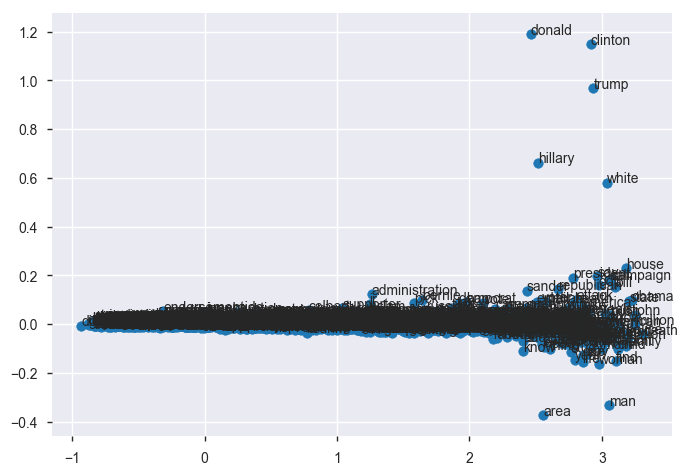

In [44]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.rcParams['figure.figsize'] = [10, 5]
pyplot.show()

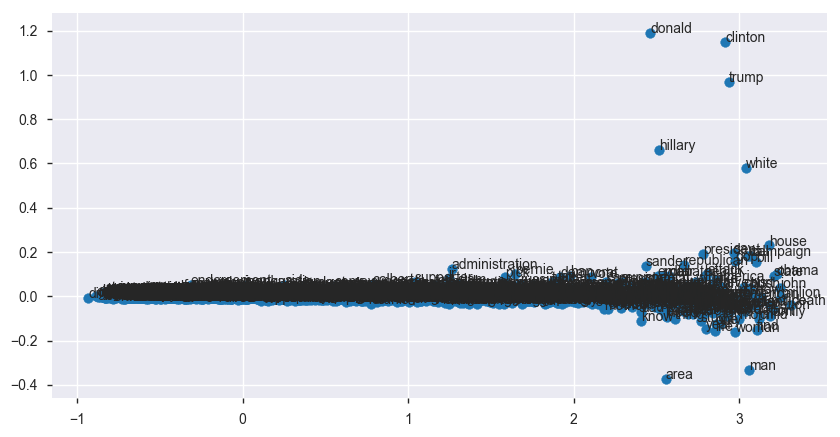

In [45]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.rcParams['figure.figsize'] = [50, 100]
pyplot.show()

In [46]:
redundant = ['is_sarcastic','article_link','headline_feature','sentence_feature','tokens','website_name']
features = list(set(raw_df2.columns) - set(redundant))
target_var = ['is_sarcastic']
#list(features)

In [47]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(raw_df2['website_name'])
# #LabelEncoder()
# list(le.classes_)

In [48]:
#raw_df2['website_name'] = le.transform(raw_df2['website_name']) 

In [49]:
raw_df2.head(3)

c0        c1        c2        c3        c4        c5        c6  \
0  0.274168 -0.150546  0.059893  0.224827  0.036582 -0.190299  0.169621   
1  0.233305 -0.126265  0.049257  0.190394  0.033067 -0.163058  0.146084   
2  0.290759 -0.160810  0.064429  0.244655  0.048070 -0.213538  0.185789   

         c7        c8        c9       c10       c11       c12       c13  \
0 -0.064037 -0.053401 -0.259389  0.425704  0.070578  0.221329  0.112935   
1 -0.056561 -0.043087 -0.222842  0.359223  0.059122  0.188423  0.094403   
2 -0.065747 -0.050858 -0.279039  0.455085  0.074029  0.239927  0.117926   

        c14       c15       c16       c17       c18       c19       c20  \
0  0.486422 -0.282902  0.148083 -0.026677  0.411210 -0.061959 -0.015309   
1  0.413365 -0.239079  0.125498 -0.022821  0.349204 -0.052908 -0.012389   
2  0.518681 -0.301781  0.161354 -0.031552  0.441159 -0.059920 -0.018920   

        c21       c22       c23       c24       c25       c26       c27  \
0 -0.023665 -0.003894  0.026705  0.140937  0.293540  0.109532 -0.232580   
1 -0.020756 -0.004638  0.020353  0.123590  0.249676  0.095661 -0.195321   
2 -0.024454 -0.006840  0.022940  0.157547  0.313845  0.113738 -0.244092   

        c28       c29       c30       c31       c32       c33       c34  \
0  0.074654  0.020016  0.059275 -0.005964 -0.061964 -0.422296 -0.538248   
1  0.063901  0.017299  0.047371 -0.005015 -0.051773 -0.355979 -0.459422   
2  0.083185  0.022611  0.059770 -0.003943 -0.070219 -0.446287 -0.579953   

        c35       c36       c37       c38       c39       c40       c41  \
0  0.083242  0.025385  0.183581  0.139465  0.085414  0.081911  0.313102   
1  0.072608  0.016467  0.156735  0.117392  0.074635  0.069502  0.267212   
2  0.093275  0.020580  0.195417  0.148255  0.092750  0.084104  0.334108   

        c42       c43       c44       c45       c46       c47       c48  \
0 -0.156056 -0.324125  0.287667  0.204137 -0.011004  0.084281  0.287820   
1 -0.130264 -0.275704  0.246910  0.171713 -0.008313  0.072659  0.243683   
2 -0.166261 -0.348191  0.307077  0.223703 -0.011653  0.092972  0.307727   

        c49       c50       c51       c52       c53       c54       c55  \
0  0.136286  0.123938  0.350997  0.024427  0.090099  0.402080 -0.024964   
1  0.115005  0.102331  0.297784  0.018740  0.075954  0.342428 -0.019083   
2  0.144924  0.126054  0.377337  0.025665  0.096039  0.438008 -0.019806   

        c56       c57       c58       c59       c60       c61       c62  \
0 -0.135470  0.065114  0.181833  0.304369 -0.000841 -0.004882 -0.185101   
1 -0.112885  0.056030  0.151824  0.257200 -0.002668 -0.001223 -0.157828   
2 -0.141800  0.069118  0.193330  0.325895 -0.001525 -0.002334 -0.197122   

        c63       c64       c65       c66       c67       c68       c69  \
0 -0.174728 -0.176873  0.110173 -0.015153  0.206379  0.047731  0.165000   
1 -0.146837 -0.147124  0.092236 -0.010354  0.174268  0.041740  0.139830   
2 -0.183714 -0.190090  0.118320 -0.012758  0.217738  0.051361  0.177181   

        c70       c71       c72       c73       c74       c75       c76  \
0  0.254200  0.028461 -0.134973 -0.128376  0.197776 -0.142860 -0.420556   
1  0.218002  0.022690 -0.111840 -0.108198  0.169612 -0.122624 -0.356898   
2  0.270739  0.033008 -0.142210 -0.133767  0.210905 -0.154437 -0.448659   

        c77       c78       c79       c80       c81       c82       c83  \
0 -0.040070 -0.329097 -0.199518  0.198989  0.164178 -0.151947  0.020859   
1 -0.034419 -0.279119 -0.169660  0.169748  0.137278 -0.128102  0.019685   
2 -0.041245 -0.349303 -0.212982  0.214134  0.175597 -0.161898  0.022526   

        c84       c85       c86       c87       c88       c89       c90  \
0  0.198363  0.170278  0.041699 -0.074543  0.408145  0.043594  0.172733   
1  0.169266  0.144724  0.031325 -0.062903  0.345030  0.037182  0.145801   
2  0.218463  0.179585  0.044005 -0.073621  0.435985  0.044518  0.186421   

        c91       c92       c93       c94       c95       c96       c97  \
0 -0.143516  0.275029

In [50]:
from sklearn.model_selection import train_test_split, StratifiedKFold
train_data, test_data, train_target, test_target = train_test_split(raw_df2[features].as_matrix(), raw_df2[target_var], train_size = .8, random_state = 100)

In [51]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import linear_model

clf = linear_model.LogisticRegressionCV(cv = 5, random_state=0, solver='lbfgs',multi_class='ovr',penalty='l2').fit(train_data, train_target.values.ravel())
clf.score(train_data, train_target.values.ravel())

0.83727242944727853

In [52]:
from sklearn.metrics import accuracy_score
y_true = test_target.values.ravel()
y_pred = clf.predict(test_data)
accuracy_score(y_true, y_pred)

0.78341445151628608

In [53]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp  = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2539, 467, 690, 1646)

In [54]:
weights = clf.coef_

In [55]:
feature_weights = np.abs(weights[0])

In [56]:
feature_names = np.array(raw_df2[features].columns)

In [57]:
pd.set_option("display.max_rows", 200)

In [58]:
feature_importance = pd.DataFrame({'Features':feature_names, 'Weights':feature_weights}).sort_values(by='Weights', ascending=False).reset_index(drop = True)
feature_importance.head(200)

Features   Weights
0    area           2.808853
1    nation         2.489616
2    introduces     2.102512
3    shit           2.067942
4    local          1.946845
5    self           1.890878
6    fucking        1.880292
7    report         1.863998
8    study          1.788817
9    clearly        1.658466
10   announces      1.618566
11   man            1.617414
12   fuck           1.579949
13   unveils        1.559291
14   trans          1.485559
15   hoping         1.481223
16   excited        1.479096
17   romney         1.463867
18   audience       1.450054
19   queer          1.435068
20   allegedly      1.429967
21   donald         1.383428
22   given          1.370788
23   tweet          1.368374
24   asshole        1.367983
25   friend         1.362749
26   forced         1.362089
27   employee       1.356067
28   struggling     1.354025
29   accused        1.348288
30   entire         1.347945
31   god            1.346721
32   bush           1.327785
33   jenner         1.327663
34   hawaii         1.321229
35   california     1.312773
36   onion          1.302354
37   apartment      1.301821
38   lgbt           1.298386
39   near           1.297967
40   guy            1.280715
41   muslim         1.278305
42   recommends     1.267675
43   unable         1.262438
44   quickly        1.259786
45   realizes       1.259540
46   transgender    1.256138
47   protest        1.250536
48   spends         1.248198
49   allows         1.231247
50   instagram      1.229423
51   york           1.224504
52   wondering      1.222331
53   kardashian     1.217665
54   desperate      1.216602
55   scientist      1.200040
56   france         1.192726
57   currently      1.190372
58   abuse          1.185375
59   lgbtq          1.181160
60   huffpost       1.177515
61   trailer        1.167396
62   unaware        1.161460
63   snl            1.155590
64   announce       1.151255
65   pretty         1.142542
66   uber           1.142519
67   coworker       1.129366
68   asks           1.124746
69   archive        1.111543
70   assures        1.108067
71   secretary      1.107075
72   harvey         1.106833
73   rip            1.103630
74   hillary        1.102592
75   dear           1.086554
76   room           1.084516
77   able           1.072986
78   democrat       1.072932
79   leadership     1.067202
80   panicked       1.066523
81   quietly        1.061436
82   adele          1.060424
83   reportedly     1.058433
84   wife           1.057267
85   democratic     1.057200
86   insurance      1.056214
87   twitter        1.053124
88   lesson         1.052950
89   relieved       1.048962
90   recipe         1.046559
91   purchase       1.039596
92   neighborhood   1.038880
93   crowd          1.038486
94   disability     1.035072
95   begin          1.032577
96   enough         1.030807
97   vow            1.029450
98   share          1.022160
99   minute         1.022104
100  outside        1.021929
101  uk             1.015725
102  according      1.013754
103  unsure         1.013064
104  frustrated     1.009678
105  ebola          1.008803
106  pride          1.007654
107  slowly         1.007085
108  restriction    1.005995
109  watch          1.003945
110  magazine       1.003574
111  tip            1.002672
112  aide           1.002033
113  alqaeda        1.001574
114  sunday         1.001229
115  hand           0.997304
116  breaking       0.995172
117  jailed         0.994148
118  discover       0.990935
119  heroic         0.989501
120  disappointed   0.987941
121  climate        0.983036
122  cuba           0.979699
123  stare          0.979508
124  myth           0.979258
125  dangerous      0.976908
126  bored          0.974338
127  elderly        0.974228
128  colbert        0.971486
129  conservative   0.968845
130  gave           0.964010
131  marijuana      0.962687
132  nfl            0.958096
133  amid           0.957437
134  archaeologist  0.954232
135  selfie         0.953474
136  roommate       0.949387
137  man

In [59]:
raw_df[tokenDF_Final.self == 1][['article_link','headline_feature','is_sarcastic']].head(3).reset_index(drop=True)

article_link  \
0  https://local.theonion.com/just-take-it-slow-and-you-ll-be-fine-drunk-driver-a-1820399426    
1  https://www.theonion.com/bashar-al-assad-tries-tiny-bit-of-sarin-gas-on-self-to-1819575557   
2  https://www.theonion.com/narcissist-mentally-undresses-self-1819567215                       

                                                                                              headline_feature  \
0  'just take it slow, and you'll be fine,' drunk driver assures self while speeding away in stolen police car   
1  bashar al-assad tries tiny bit of sarin gas on self to see what it's like                                     
2  narcissist mentally undresses self                                                                            

   is_sarcastic  
0  1             
1  1             
2  1

In [60]:
import xgboost as xgb
clf1 = xgb.XGBClassifier(max_depth = 5, max_child_weight = 5, eta = 0.1, subsample = 1, colsample_bytree = 1, \
                          objective = 'reg:linear', num_boost_round=100, early_stopping_rounds=5).fit(train_data, train_target.values.ravel())
clf1.score(train_data, train_target.values.ravel())

0.73201666120653341

In [61]:
y_pred = clf1.predict(test_data)
accuracy_score(y_true, y_pred)

0.70366903781355294

In [62]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(max_depth = 10, criterion="entropy").fit(train_data, train_target.values.ravel())
clf2.score(train_data, train_target.values.ravel())

0.65301633359853983

In [63]:
y_pred = clf2.predict(test_data)
accuracy_score(y_true, y_pred)

0.64283040059902663

In [64]:
tn, fp, fn, tp  = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2898, 108, 1800, 536)

In [65]:
feature_importance[feature_importance.Features.isin(w2v_col_names)]

Features   Weights
399   c23      0.710881
612   c19      0.620357
839   c18      0.542748
862   c57      0.534030
875   c1       0.528192
1012  c66      0.484245
1156  c73      0.451678
1202  c4       0.439356
1374  c38      0.397893
1377  c87      0.397051
1392  c35      0.392637
1431  c67      0.384751
1543  c17      0.359481
1560  c3       0.356454
1667  c31      0.334661
1679  c34      0.332563
1715  c21      0.324587
1727  c92      0.322758
1734  c41      0.320235
1746  c49      0.318251
1759  c89      0.315678
1849  c61      0.297967
1917  c59      0.285434
1931  c40      0.283303
1947  c5       0.279310
2187  c44      0.231901
2192  c11      0.231105
2227  c98      0.224138
2236  c51      0.222340
2246  c62      0.219460
2247  c96      0.219207
2249  c54      0.219162
2395  c53      0.192408
2404  c16      0.190980
2419  c8       0.188247
2431  c26      0.186213
2434  c43      0.185882
2440  c13      0.184710
2441  c64      0.184646
2508  c88      0.172355
2512  c48      0.171380
2536  c14      0.167902
2537  c82      0.167693
2546  c69      0.165964
2564  c80      0.162513
2583  c90      0.159283
2586  c7       0.158375
2593  c86      0.156865
2601  c63      0.155921
2624  c39      0.152421
2628  c60      0.152013
2636  c29      0.150823
2642  c68      0.149574
2643  c75      0.149519
2683  c74      0.142781
2701  c93      0.139371
2702  c20      0.139333
2734  c27      0.133387
2738  c52      0.132749
2780  c33      0.127329
2783  c91      0.126549
2788  c78      0.125379
2794  c58      0.124772
2818  c76      0.120753
2848  c10      0.115445
2891  c32      0.107786
2904  c72      0.106080
2925  c81      0.101727
2941  c0       0.098597
2968  c95      0.093243
3020  c45      0.083774
3022  c79      0.083539
3025  c36      0.082885
3035  c28      0.080963
3042  c65      0.079839
3081  c22      0.074408
3160  c6       0.060966
3175  c30      0.058602
3182  c12      0.057605
3189  c47      0.056592
3222  c15      0.050761
3256  c94      0.046619
3269  c55      0.043202
3272  c56      0.042831
3289  c84      0.039921
3304  c25      0.037100
3335  c99      0.033561
3337  c83      0.032886
3340  c46      0.032274
3350  c97      0.030541
3375  c50      0.025789
3385  c85      0.023216
3409  c71      0.019737
3431  c24      0.016989
3444  c37      0.014288
3445  c42      0.014255
3452  c9       0.013686
3454  c70      0.013115
3490  c77      0.007071
3496  c2       0.005927